In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("vehicle.csv")
df.head()


,Compactness,Circularity,Distance.Circularity,Radius.Ratio,Pr.Axis.Aspect.Ratio,Max.Length.Aspect.Ratio,Scatter.Ratio,Elongatedness,Pr.Axis.Rectangularity,Max.Length.Rectangularity,Scaled.Variance.Along.Major.Axis,Scaled.Variance.Along.Minor.Axis,Scaled.Radius.of.Gyration,Skewness.About.Major.Axis,Skewness.About.Minor.Axis,Kurtosis.About.Minor.Axis,Kurtosis.About.Major.Axis,Hollows.Ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,4
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,4
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,4
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,3


In [3]:
df['class'].value_counts()


3    218
2    217
1    212
4    199
Name: class, dtype: int64

In [4]:
len(df.columns)


19

In [5]:
#df['class'].any

### 1-a)sumarry of dataframe

In [6]:
print("columns of data","\n",df.columns , "\n\n\n","description of data" ,'\n',df.describe() ,
      "\n\n" ,"shape of data\n",df.shape)


columns of data 
 Index(['Compactness', 'Circularity', 'Distance.Circularity', 'Radius.Ratio',
       'Pr.Axis.Aspect.Ratio', 'Max.Length.Aspect.Ratio', 'Scatter.Ratio',
       'Elongatedness', 'Pr.Axis.Rectangularity', 'Max.Length.Rectangularity',
       'Scaled.Variance.Along.Major.Axis', 'Scaled.Variance.Along.Minor.Axis',
       'Scaled.Radius.of.Gyration', 'Skewness.About.Major.Axis',
       'Skewness.About.Minor.Axis', 'Kurtosis.About.Minor.Axis',
       'Kurtosis.About.Major.Axis', 'Hollows.Ratio', 'class'],
      dtype='object') 


 description of data 
        Compactness  Circularity  Distance.Circularity  Radius.Ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.861702             82.088652    168.940898   
std       8.234474     6.169866             15.771533     33.472183   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%  

## 1-b)Answer:


In [7]:
df1 = df.copy()
df1['class'].unique()


array([4, 2, 3, 1], dtype=int64)

In [8]:
df1['class'].replace(1, '2D', inplace= True)
df1['class'].replace(2, '4D', inplace= True)
df1['class'].replace(3, 'BUS', inplace= True)
df1['class'].replace(4, 'VAN', inplace= True)
df1['class'].unique()


array(['VAN', '4D', 'BUS', '2D'], dtype=object)

## 1-c)Answer:


In [9]:
df_feature= df1.drop('class', axis= 1)


In [10]:
df_feature.columns


Index(['Compactness', 'Circularity', 'Distance.Circularity', 'Radius.Ratio',
       'Pr.Axis.Aspect.Ratio', 'Max.Length.Aspect.Ratio', 'Scatter.Ratio',
       'Elongatedness', 'Pr.Axis.Rectangularity', 'Max.Length.Rectangularity',
       'Scaled.Variance.Along.Major.Axis', 'Scaled.Variance.Along.Minor.Axis',
       'Scaled.Radius.of.Gyration', 'Skewness.About.Major.Axis',
       'Skewness.About.Minor.Axis', 'Kurtosis.About.Minor.Axis',
       'Kurtosis.About.Major.Axis', 'Hollows.Ratio'],
      dtype='object')

###  Calculating Corelation more the .7 (we called df as df7 for this part)


In [11]:
df7= df_feature.corr().abs()
df7.head()


,Compactness,Circularity,Distance.Circularity,Radius.Ratio,Pr.Axis.Aspect.Ratio,Max.Length.Aspect.Ratio,Scatter.Ratio,Elongatedness,Pr.Axis.Rectangularity,Max.Length.Rectangularity,Scaled.Variance.Along.Major.Axis,Scaled.Variance.Along.Minor.Axis,Scaled.Radius.of.Gyration,Skewness.About.Major.Axis,Skewness.About.Minor.Axis,Kurtosis.About.Minor.Axis,Kurtosis.About.Major.Axis,Hollows.Ratio
Compactness,1.000000,0.692869,0.792444,0.691659,0.093222,0.148249,0.813003,0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,0.252984,0.233693,0.156779,0.297780,0.365552
Circularity,0.692869,1.000000,0.798492,0.622778,0.149692,0.247467,0.860367,0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,0.015482,0.113047,0.038677
Distance.Circularity,0.792444,0.798492,1.000000,0.771644,0.161529,0.264309,0.907280,0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,0.231660,0.116478,0.264522,0.147980,0.335453
Radius.Ratio,0.691659,0.622778,0.771644,1.000000,0.665407,0.448048,0.738460,0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,0.182412,0.050534,0.174299,0.380757,0.469278
Pr.Axis.Aspect.Ratio,0.093222,0.149692,0.161529,0.665407,1.000000,0.648096,0.106064,0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152304,0.056807,0.034180,0.238195,0.267381


In [12]:


df7_unstack = df7.unstack()
# so = df7_unstack.sort_values(kind="quicksort")
df7_unstack = pd.DataFrame(df7_unstack,columns =["corr"])
df7_sotr = df7_unstack.sort_values(by = ["corr"])
df7_result = df7_sotr[(df7_sotr["corr"] >.7) & (df7_sotr["corr"] <1)]
df7_result.head()


,,corr
Scaled.Radius.of.Gyration,Distance.Circularity,0.705818
Distance.Circularity,Scaled.Radius.of.Gyration,0.705818
Radius.Ratio,Pr.Axis.Rectangularity,0.711497
Pr.Axis.Rectangularity,Radius.Ratio,0.711497
Scaled.Variance.Along.Minor.Axis,Radius.Ratio,0.725781


###  Calculating Corelation more the .9 (we called df as df9 for this part)

In [13]:
df9_result = df7_sotr[(df7_sotr["corr"] >.9) & (df7_sotr["corr"] <1) ]
df9_result


corr
Scatter.Ratio                    Distance.Circularity              0.907280
Distance.Circularity             Scatter.Ratio                     0.907280
                                 Elongatedness                     0.912307
Elongatedness                    Distance.Circularity              0.912307
Circularity                      Scaled.Radius.of.Gyration         0.936080
Scaled.Radius.of.Gyration        Circularity                       0.936080
Scaled.Variance.Along.Major.Axis Pr.Axis.Rectangularity            0.938266
Pr.Axis.Rectangularity           Scaled.Variance.Along.Major.Axis  0.938266
Scaled.Variance.Along.Major.Axis Elongatedness                     0.938392
Elongatedness                    Scaled.Variance.Along.Major.Axis  0.938392
Scaled.Variance.Along.Major.Axis Scaled.Variance.Along.Minor.Axis  0.949888
Scaled.Variance.Along.Minor.Axis Scaled.Variance.Along.Major.Axis  0.949888
Pr.Axis.Rectangularity           Elongatedness                     0.950512
Elongatedness                    Pr.Axis.Rectangularity            0.950512
Scatter.Ratio                    Scaled.Variance.Along.Major.Axis  0.951862
Scaled.Variance.Along.Major.Axis Scatter.Ratio                     0.951862
Elongatedness                    Scaled.Variance.Along.Minor.Axis  0.956522
Scaled.Variance.Along.Minor.Axis Elongatedness                     0.956522
Circularity                      Max.Length.Rectangularity         0.965776
Max.Length.Rectangularity        Circularity                       0.965776
Elongatedness                    Scatter.Ratio                     0.973385
Scatter.Ratio                    Elongatedness                     0.973385
Pr.Axis.Rectangularity           Scatter.Ratio                     0.992088
Scatter.Ratio                    Pr.Axis.Rectangularity            0.992088
Pr.Axis.Rectangularity           Scaled.Variance.Along.Minor.Axis  0.992346
Scaled.Variance.Along.Minor.Axis Pr.Axis.Rectangularity            0.992346
Scatter.Ratio                    Scaled.Variance.Along.Minor.Axis  0.996318
Scaled.Variance.Along.Minor.Axis Scatter.Ratio                     0.996318

### 2) Split Train and Test

In [14]:
train_df = df1.iloc[:3*int(len(df1)/4)+1, :]
test_df = df1.iloc[3*int(len(df1)/4)+1:, :]


In [15]:
train_df.head(6)


,Compactness,Circularity,Distance.Circularity,Radius.Ratio,Pr.Axis.Aspect.Ratio,Max.Length.Aspect.Ratio,Scatter.Ratio,Elongatedness,Pr.Axis.Rectangularity,Max.Length.Rectangularity,Scaled.Variance.Along.Major.Axis,Scaled.Variance.Along.Minor.Axis,Scaled.Radius.of.Gyration,Skewness.About.Major.Axis,Skewness.About.Minor.Axis,Kurtosis.About.Minor.Axis,Kurtosis.About.Major.Axis,Hollows.Ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,VAN
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,VAN
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,4D
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,VAN
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,BUS
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,BUS


In [16]:
test_df.head(6)


,Compactness,Circularity,Distance.Circularity,Radius.Ratio,Pr.Axis.Aspect.Ratio,Max.Length.Aspect.Ratio,Scatter.Ratio,Elongatedness,Pr.Axis.Rectangularity,Max.Length.Rectangularity,Scaled.Variance.Along.Major.Axis,Scaled.Variance.Along.Minor.Axis,Scaled.Radius.of.Gyration,Skewness.About.Major.Axis,Skewness.About.Minor.Axis,Kurtosis.About.Minor.Axis,Kurtosis.About.Major.Axis,Hollows.Ratio,class
634,81,38,53,123,58,6,134,51,18,128,147,259,148,83,10,6,177,184,2D
635,97,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186,VAN
636,96,41,69,153,56,7,141,47,18,141,162,297,169,61,11,8,202,209,4D
637,86,44,65,129,56,6,152,45,19,150,168,331,177,83,4,13,178,183,BUS
638,97,49,76,203,73,7,178,36,21,157,194,487,186,72,0,7,197,200,BUS
639,108,55,105,230,68,11,218,30,24,171,228,709,210,69,14,4,190,197,2D


In [17]:
test_df["class"].unique()


array(['2D', 'VAN', '4D', 'BUS'], dtype=object)

### 3)  KNN

In [18]:
x_train_df = train_df.drop("class",axis=1)
y_train_df = train_df["class"]

x_test_df = test_df.drop("class",axis=1)
y_test_df = test_df["class"]


In [19]:
scaler = StandardScaler()


In [20]:
scaled_X_train = scaler.fit_transform(x_train_df)
scaled_X_test = scaler.transform(x_test_df)


In [21]:
knn_model = KNeighborsClassifier(n_neighbors=1)


In [22]:
knn_model.fit(scaled_X_train,y_train_df)


KNeighborsClassifier(n_neighbors=1)

In [23]:
knn_model.classes_


array(['2D', '4D', 'BUS', 'VAN'], dtype=object)

##  Model Evaluation

In [24]:
y_pred = knn_model.predict(scaled_X_test)


In [25]:
accuracy_score(y_test_df,y_pred)


0.6886792452830188

## 3) a) Confusion_matrix

In [26]:
confusion_matrix(y_test_df,y_pred, labels= ['2D', '4D', 'BUS', 'VAN'])


array([[24, 19,  3,  2],
       [32, 27,  0,  3],
       [ 1,  0, 52,  0],
       [ 2,  3,  1, 43]], dtype=int64)

In [27]:
df_cf_mt = pd.DataFrame(confusion_matrix(y_test_df,y_pred),columns=['2D', '4D', 'BUS', 'VAN'], index= ['2D', '4D', 'BUS', 'VAN'])
df_cf_mt


,2D,4D,BUS,VAN
2D,24,19,3,2
4D,32,27,0,3
BUS,1,0,52,0
VAN,2,3,1,43


###  It seems that the number of True prediction in "BUS" class is more than others,and True 

### prediction in"2D" class is less than others, so classification in Bus and Van are easier and 

### in 2D and 4D are harder


## 3)  b)Report misclassification rate and standard error

In [28]:
print(classification_report(y_test_df,y_pred))


              precision    recall  f1-score   support

          2D       0.41      0.50      0.45        48
          4D       0.55      0.44      0.49        62
         BUS       0.93      0.98      0.95        53
         VAN       0.90      0.88      0.89        49

    accuracy                           0.69       212
   macro avg       0.70      0.70      0.69       212
weighted avg       0.69      0.69      0.69       212



In [29]:
print("2D missclass:",np.round((1-.41),2),"\t\t" ,"4D missclass:",
      np.round((1-.55),2),"\n\n","BUS missclass:",np.round((1-.93),2) ,
      "\t\t","VAN missclass:",np.round((1-.93),2) )



2D missclass: 0.59 		 4D missclass: 0.45 

 BUS missclass: 0.07 		 VAN missclass: 0.07


In [30]:
missclassification = np.array([.59,.45,.07,.07])
missclassification_1SE = missclassification.std()
missclassification_1SE
print ("missclassification_Standard Erorr = ",np.round(missclassification_1SE,2))



missclassification_Standard Erorr =  0.23


## 4)

In [31]:

df1.head()


,Compactness,Circularity,Distance.Circularity,Radius.Ratio,Pr.Axis.Aspect.Ratio,Max.Length.Aspect.Ratio,Scatter.Ratio,Elongatedness,Pr.Axis.Rectangularity,Max.Length.Rectangularity,Scaled.Variance.Along.Major.Axis,Scaled.Variance.Along.Minor.Axis,Scaled.Radius.of.Gyration,Skewness.About.Major.Axis,Skewness.About.Minor.Axis,Kurtosis.About.Minor.Axis,Kurtosis.About.Major.Axis,Hollows.Ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,VAN
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,VAN
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,4D
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,VAN
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,BUS


In [32]:
X = df1.drop('class',axis=1)
y = df1['class']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=9910314)


In [34]:
scaler = StandardScaler()


In [35]:
knn = KNeighborsClassifier()


In [36]:
knn.get_params().keys()


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
#Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]


In [38]:
pipe = Pipeline(operations)


In [39]:
# Note: If your parameter grid is going inside a PipeLine, your parameter name needs to
#be specified in the following manner:*

#     chosen_string_name + two underscores + parameter key name
#     model_name + __ + parameter name
#     knn_model + __ + n_neighbors
#     knn_model__n_neighbors

# StackOverflow on this

# The reason we have to do this is because it let's scikit-learn know
# what operation in the pipeline these parameters are related to 
# (otherwise it might think n_neighbors was a parameter in the scaler).

In [66]:
k_values = list(range(1,41))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [42]:
param_grid = {'knn__n_neighbors': k_values}


In [43]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv= 5, scoring= 'accuracy')


In [44]:
full_cv_classifier.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [45]:
full_cv_classifier.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [46]:
#full_cv_classifier.cv_results_

In [47]:
#full_cv_classifier.best_estimator_.get_params()

In [48]:
full_cv_classifier.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [49]:
# Let's check our understanding:
# **How many total runs did we do?**



In [50]:
len(k_values)


40

## 4) a - Plot

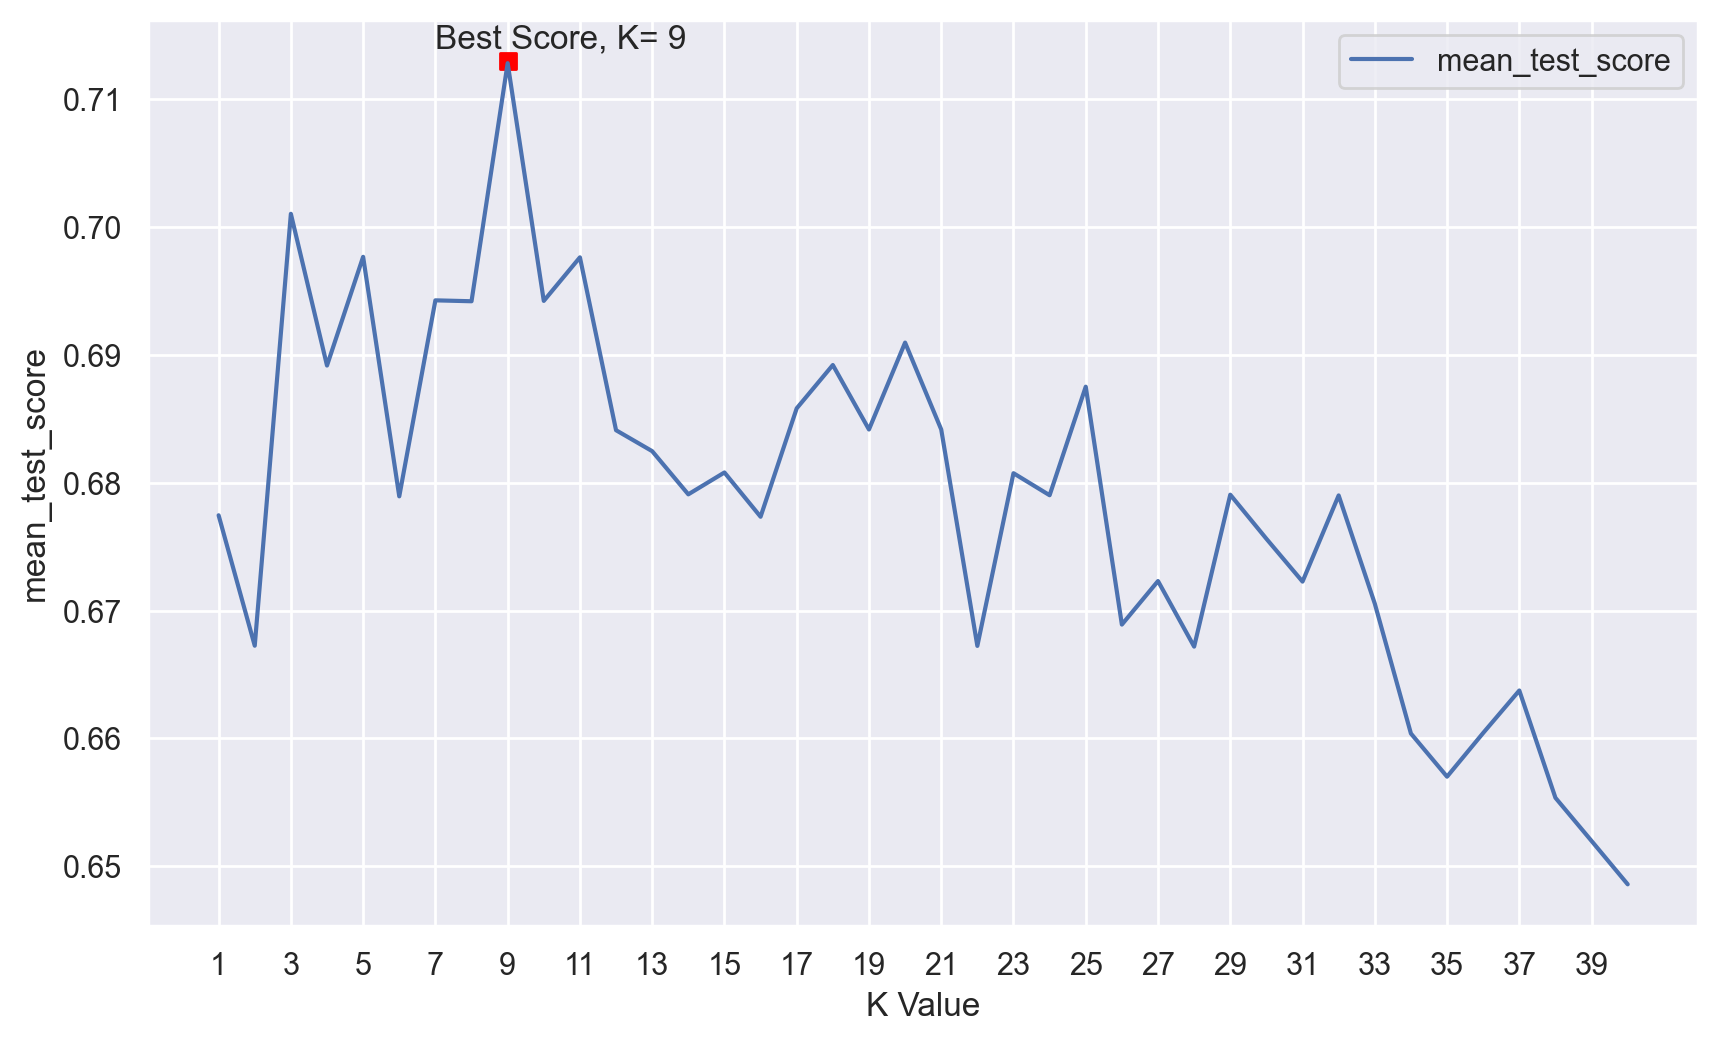

In [129]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(np.arange(1,41),full_cv_classifier.cv_results_['mean_test_score'],label='mean_test_score')
plt.legend()
plt.xticks(np.arange(1,41, step = 2))
plt.annotate('Best Score, K= 9',xy=(7,0.714))
plt.scatter(9, 0.713, c= 'red', marker ='s')
plt.ylabel('mean_test_score')
plt.xlabel("K Value")
plt.show()


## We just saw that our  GridSearch recommends a K=9 Neighbors


## 4) b

In [52]:
full_cv_classifier.cv_results_['mean_test_score']


array([0.67745335, 0.66725538, 0.70102549, 0.68916109, 0.69766415,
       0.67893462, 0.69426008, 0.69418886, 0.71280444, 0.69421735,
       0.69762142, 0.68410483, 0.68246689, 0.6790913 , 0.68080046,
       0.67733941, 0.68581399, 0.68920382, 0.6841618 , 0.6909557 ,
       0.6841618 , 0.66724113, 0.68074348, 0.67902008, 0.6875089 ,
       0.66890756, 0.67231164, 0.66718416, 0.67906281, 0.67561601,
       0.67226891, 0.67900584, 0.67054551, 0.66039026, 0.65701467,
       0.66043299, 0.6637516 , 0.65536248, 0.6519869 , 0.64859707])

In [53]:
# Calculating 1 SE of the results from CV.

print('1 SE of  CV result is : %.3f' %full_cv_classifier.cv_results_['mean_test_score'].std())


1 SE of  CV result is : 0.014


In [54]:
# Finding the Best Result from CV

print('Best result: %.3f' %full_cv_classifier.best_score_)
print('Index of best result is :', full_cv_classifier.best_index_)


Best result: 0.713
Index of best result is : 8


In [55]:
# Finding the Number of Neighbors according to 1 SE from best reslut

print('Best result - 1 SE = %.3f' %(0.713- 0.014))

print('The nearest point to calculated point in result array is index 3 : 0.70102549 with K= 3')


Best result - 1 SE = 0.699
The nearest point to calculated point in result array is index 3 : 0.70102549 with K= 3


### Let's  now use the PipeLine again, but this time, no need to do a grid search, 
### instead we will evaluate on our hold-out Test Set with K= 9 and K= 3 Neighbors

### 4) C

In [78]:
scaler = StandardScaler()

In [79]:
knn9 = KNeighborsClassifier(n_neighbors= 9)
operations = [('scaler',scaler),('knn9',knn9)]


In [80]:
pipe = Pipeline(operations)

In [81]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [82]:
pipe_pred = pipe.predict(X_test)

In [83]:
# Missclassification with K= 9

print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

          2D       0.61      0.40      0.48        78
          4D       0.50      0.58      0.54        59
         BUS       0.89      0.96      0.92        57
         VAN       0.78      0.95      0.86        60

    accuracy                           0.70       254
   macro avg       0.69      0.72      0.70       254
weighted avg       0.69      0.70      0.68       254



In [113]:
knn3 = KNeighborsClassifier(n_neighbors= 3)
operations = [('scaler',scaler),('knn3',knn3)]
pipe = Pipeline(operations)

In [114]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn3', KNeighborsClassifier(n_neighbors=3))])

In [115]:
# Missclassification with K= 3


pipe_pred = pipe.predict(X_test)
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

          2D       0.58      0.49      0.53        78
          4D       0.49      0.58      0.53        59
         BUS       0.95      0.95      0.95        57
         VAN       0.85      0.88      0.87        60

    accuracy                           0.70       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.71      0.70      0.70       254



In [89]:
knn3.fit(scaled_X_train,y_train_df)

KNeighborsClassifier(n_neighbors=3)

In [107]:
y_pred3 = knn3.predict(scaled_X_test)
print('Shape of Predictions:     ',y_pred3.shape)
print('Shape of test data labels:',y_test_df.shape)


Shape of Predictions:      (212,)
Shape of test data labels: (212,)


In [110]:
knn3.score(scaled_X_test, y_test_df)


0.7028301886792453

In [111]:
knn9.score(scaled_X_test, y_test_df)

0.7594339622641509

**Score of KNN with K=9 is 0.75**

**Score of KNN with K=3 is 0.70**